### Census Income Project
Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



In [1]:
import pandas as pd
import numpy as np 
import warnings 
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("census_income.csv")
df.head(25)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [3]:
df.shape

(32560, 15)

In [4]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [7]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


In [9]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [10]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [11]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [12]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [13]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [14]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [15]:
df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [16]:
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [17]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [18]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [19]:
df['Workclass'] = df['Workclass'].str.replace('?', 'Private',regex = True)
df['Occupation'] = df['Occupation'].str.replace('?','Prof-specialty',regex = True)
df['Native_country'] = df['Native_country'].str.replace('?','United-states', regex = True)

In [20]:
df.head(30)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [21]:
df['Marital_status'] = df['Marital_status'].replace(['Married-civ-spouse ','Married-AF-spouse'],'Married',regex = True)
df['Marital_status'] = df['Marital_status'].replace(['Never-married'],'Un-Married',regex = True)
df['Marital_status'] = df['Marital_status'].replace(['Divorced','Separated','Widowed','Married-spouse-absent'],'Others',regex = True)


In [30]:
df['Education'] = df['Education'].replace(['Preschool','1st-4th ','5th-6th','7th-8th','9th','10th','11th','12th'],'School',regex = True)
df['Education'] = df['Education'].replace(['HS-grad'],'High School',regex = True )
df['Education'] = df['Education'].replace(['Assoc-voc','Assoc-acdm','Prof-school','Some-college'],'Specialization',regex = True)

In [31]:
df['Education'] = df['Education'].replace(['Bachelors'],'Grad',regex = True)
df['Education'] = df['Education'].replace(['Master'],'Post_Grad',regex = True)
df['Education'] = df['Education'].replace(['Doctorate'],'Dr',regex = True)

In [32]:
df['Income'] = df['Income'].replace('<=50K',0,regex = True)

In [33]:
df.Income = df.Income.replace('>50K',1,regex = True)

In [34]:
df['Marital_status'].value_counts()

 Married-civ-spouse    14976
 Un-Married            10682
 Others                 6879
 Married                  23
Name: Marital_status, dtype: int64

In [35]:
df['Education']

0                   Grad
1            High School
2                 School
3                   Grad
4             Post_Grads
              ...       
32555     Specialization
32556        High School
32557        High School
32558        High School
32559        High School
Name: Education, Length: 32560, dtype: object

In [36]:
df['Income']

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32560, dtype: int64

In [37]:
df.head(25)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Grad,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,High School,9,Others,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,School,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Grad,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Post_Grads,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
5,49,Private,160187,School,5,Others,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
6,52,Self-emp-not-inc,209642,High School,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
7,31,Private,45781,Post_Grads,14,Un-Married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
8,42,Private,159449,Grad,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1
9,37,Private,280464,Specialization,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,1


### Data Visualization

In [38]:
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234039
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770,-0.009481
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127,0.335182
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409,0.223333
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256,0.150523
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000,0.229690
Income,0.234039,-0.009481,0.335182,0.223333,0.150523,0.229690,1.000000


<AxesSubplot:>

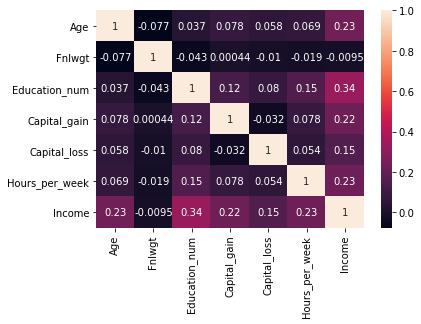

In [39]:
sns.heatmap(df.corr(),annot = True)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>,
        <AxesSubplot:title={'center':'Education_num'}>],
       [<AxesSubplot:title={'center':'Capital_gain'}>,
        <AxesSubplot:title={'center':'Capital_loss'}>,
        <AxesSubplot:title={'center':'Hours_per_week'}>],
       [<AxesSubplot:title={'center':'Income'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

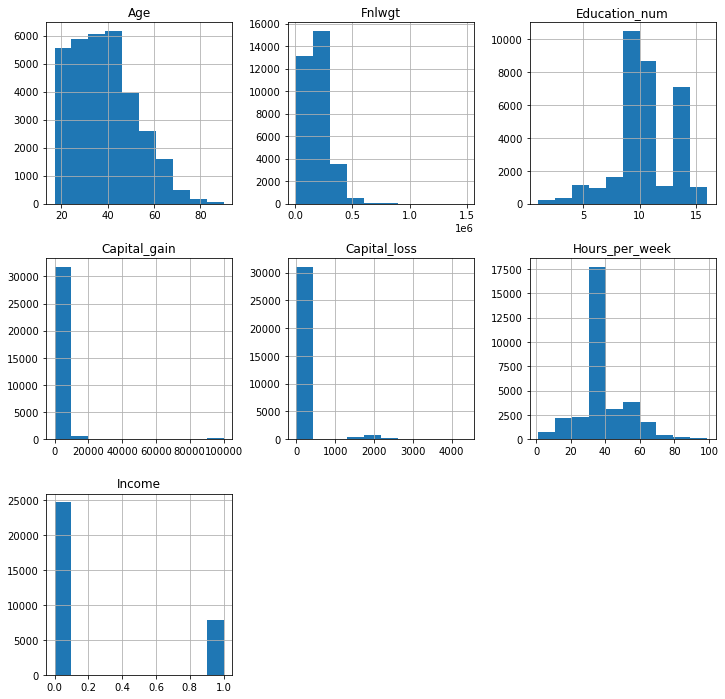

In [41]:
df.hist(figsize = (12,12),layout = (3,3),sharex = False)

Age                  AxesSubplot(0.125,0.657941;0.227941x0.222059)
Fnlwgt            AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Education_num     AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Capital_gain         AxesSubplot(0.125,0.391471;0.227941x0.222059)
Capital_loss      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Hours_per_week    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Income                  AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

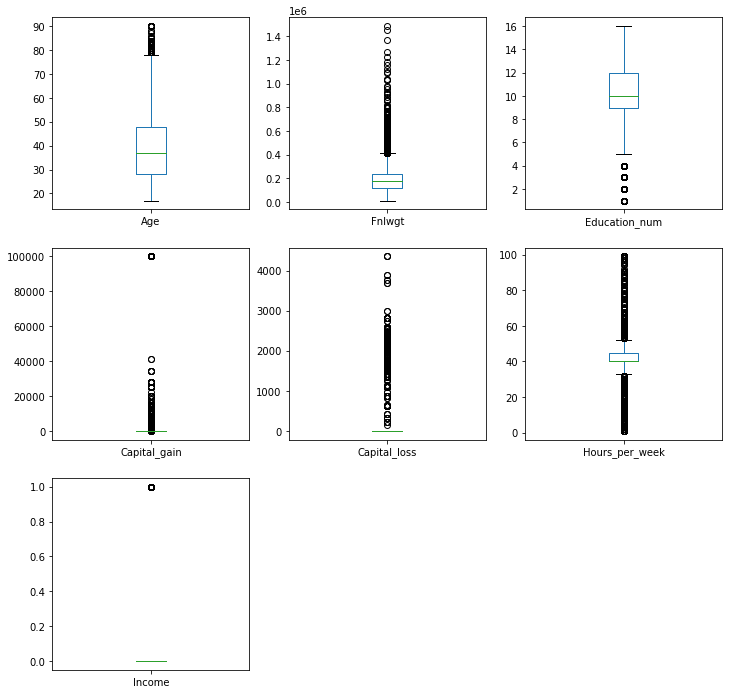

In [42]:
df.plot(kind = 'box',figsize = (12,12),layout = (3,3),sharex = False, subplots = True)

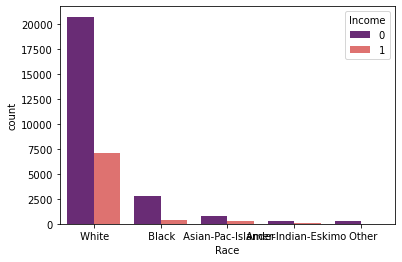

In [46]:
sns.countplot(df['Race'],hue = 'Income',data = df, palette = 'magma');

The income of the White in both case are higher, while Black income are high on the >=50k same for Asian_Pac_Islander less for others 

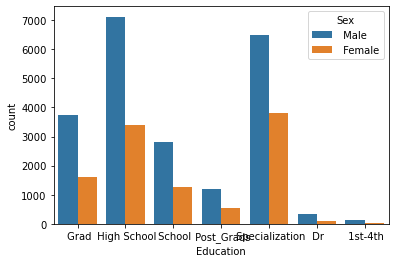

In [48]:
sns.countplot(df['Education'],hue = 'Sex',data = df);

Compared to Male to Female are have less count in edution while more people are educated in the stream of high school and specialization

<AxesSubplot:xlabel='Income', ylabel='count'>

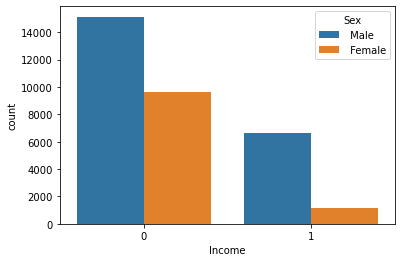

In [49]:
sns.countplot(df['Income'], hue = 'Sex',data = df)

<AxesSubplot:xlabel='Income', ylabel='count'>

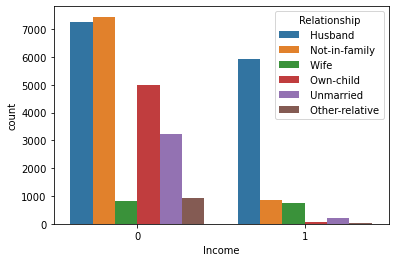

In [50]:
sns.countplot(df['Income'],hue= 'Relationship',data = df)

<AxesSubplot:xlabel='Income', ylabel='count'>

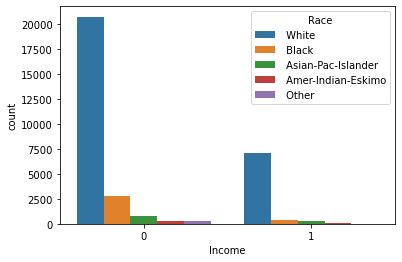

In [51]:
sns.countplot(df['Income'],hue= 'Race',data = df)

<AxesSubplot:xlabel='Income', ylabel='count'>

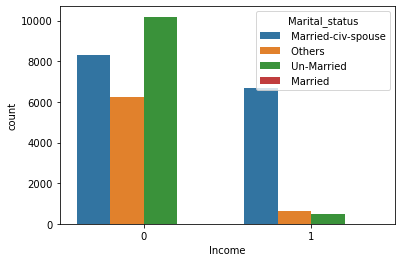

In [52]:
sns.countplot(df['Income'],hue= 'Marital_status',data = df)

### Removing Outliers 

In [54]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [55]:
df1 = df.copy()
df1 = df1.apply(LabelEncoder().fit_transform)
df1.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,5,2925,2,12,1,3,0,4,1,0,0,12,38,0
1,21,3,14085,3,8,2,5,1,4,1,0,0,39,38,0
2,36,3,15335,5,6,1,5,0,2,1,0,0,39,38,0
3,11,3,19354,2,12,1,9,5,2,0,0,0,39,4,0
4,20,3,17699,4,13,1,3,5,4,0,0,0,39,38,0


In [57]:
from scipy.stats import zscore
z = np.abs(zscore(df1))
z

array([[0.83749664, 1.72133587, 1.25206002, ..., 2.25444135, 0.2576777 ,
        0.5632099 ],
       [0.042559  , 0.08522344, 0.59298455, ..., 0.03112222, 0.2576777 ,
        0.5632099 ],
       [1.05751055, 0.08522344, 0.79964277, ..., 0.03112222, 0.2576777 ,
        0.5632099 ],
       ...,
       [1.42420039, 0.08522344, 0.43253619, ..., 0.03112222, 0.2576777 ,
        0.5632099 ],
       [1.21596651, 0.08522344, 0.39376603, ..., 1.67802528, 0.2576777 ,
        0.5632099 ],
       [0.98417258, 0.81805622, 1.21114062, ..., 0.03112222, 0.2576777 ,
        1.77553698]])

In [58]:
thresold = 3
print(np.where(z>3))

(array([    3,     7,     8, ..., 32550, 32552, 32559], dtype=int64), array([13, 10, 10, ...,  8,  8, 10], dtype=int64))


In [59]:
df_new = df1[(z<3).all(axis = 1)]
print(df1.shape)
print(df_new.shape)

(32560, 15)
(27084, 15)


### Percentage of Loss

In [60]:
loss = (32560-27084)/32560*100
print(loss)

16.818181818181817


Hence the loss of the data is greater than 10 percent we will proceed with outliers 

In [61]:
x = df.drop(['Income'],axis = 1)
y = df['Income']

In [62]:
x.shape

(32560, 14)

In [63]:
y.shape

(32560,)

In [65]:
ss = StandardScaler().fit(df1.drop('Income',axis = 1))

In [66]:
x = ss.transform(df1.drop('Income',axis = 1))
y = df['Income']

In [67]:
from sklearn.model_selection import  train_test_split
x_train,y_train,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 40)

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,f1_score

In [70]:
lg = LogisticRegression()

In [71]:
for i in range(1,15000):
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    lg.fit(x_train,y_train)
    pred_train = lg.predict(x_train)
    pred_test = lg.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1) == round(accuracy_score(y_test,pred_test)*100,1):
        print("At Random state",i,"The model performs very well")
        print("At Random state:-",i)
        print("Training Score is :-",accuracy_score(y_train,pred_train)*100)
        print("Testing Score is :-",accuracy_score(y_test,pred_test)*100)
        

At Random state 40 The model performs very well
At Random state:- 40
Training Score is :- 84.0448402948403
Testing Score is :- 84.01412776412776
At Random state 52 The model performs very well
At Random state:- 52
Training Score is :- 84.0218058968059
Testing Score is :- 84.0448402948403
At Random state 64 The model performs very well
At Random state:- 64
Training Score is :- 84.01412776412776
Testing Score is :- 83.99877149877149
At Random state 66 The model performs very well
At Random state:- 66
Training Score is :- 84.05251842751844
Testing Score is :- 84.0909090909091
At Random state 69 The model performs very well
At Random state:- 69
Training Score is :- 84.0448402948403
Testing Score is :- 84.0448402948403
At Random state 94 The model performs very well
At Random state:- 94
Training Score is :- 84.07555282555282
Testing Score is :- 84.07555282555282
At Random state 104 The model performs very well
At Random state:- 104
Training Score is :- 84.05635749385749
Testing Score is :- 

In [76]:
print("Accuracy_score:",accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

Accuracy_score: 0.629453316953317
[[3698 1220]
 [1193  401]]
              precision    recall  f1-score   support

           0       0.76      0.75      0.75      4918
           1       0.25      0.25      0.25      1594

    accuracy                           0.63      6512
   macro avg       0.50      0.50      0.50      6512
weighted avg       0.63      0.63      0.63      6512



In [81]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
lg_cv=GridSearchCV(lg,grid,cv=10)
lg_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",lg_cv.best_params_)
print("accuracy :",lg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.8402558149134212


In [82]:
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

In [83]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('Accuracy::',accuracy_score(y_test,pred))
    print('confusion matrix\n',confusion_matrix(y_test,pred)) 
    print('classification report\n',classification_report(y_test,pred))
    print('F1 score',f1_score(y_test,pred,average='micro'))

In [84]:
fun(svc)

Accuracy:: 0.8518120393120393
confusion matrix
 [[4670  284]
 [ 681  877]]
classification report
               precision    recall  f1-score   support

           0       0.87      0.94      0.91      4954
           1       0.76      0.56      0.65      1558

    accuracy                           0.85      6512
   macro avg       0.81      0.75      0.78      6512
weighted avg       0.84      0.85      0.84      6512

F1 score 0.8518120393120393


In [85]:
fun(dtc)

Accuracy:: 0.8131142506142506
confusion matrix
 [[4298  656]
 [ 561  997]]
classification report
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      4954
           1       0.60      0.64      0.62      1558

    accuracy                           0.81      6512
   macro avg       0.74      0.75      0.75      6512
weighted avg       0.82      0.81      0.81      6512

F1 score 0.8131142506142506


In [87]:
fun(knn)

Accuracy:: 0.8413697788697788
confusion matrix
 [[4483  471]
 [ 562  996]]
classification report
               precision    recall  f1-score   support

           0       0.89      0.90      0.90      4954
           1       0.68      0.64      0.66      1558

    accuracy                           0.84      6512
   macro avg       0.78      0.77      0.78      6512
weighted avg       0.84      0.84      0.84      6512

F1 score 0.8413697788697788


In [89]:
from sklearn.model_selection import GridSearchCV
params = {"criterion":['gini','entropy'],"splitter":['best','random'],"max_features":['auto', 'sqrt', 'log2']}
grid_search_cv = GridSearchCV(dtc,param_grid=params)
grid_search_cv.fit(x,y)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)

{'criterion': 'entropy', 'max_features': 'log2', 'splitter': 'best'}
DecisionTreeClassifier(criterion='entropy', max_features='log2')
0.8137592137592138


In [90]:
params={'kernel':['linear','rbf','poly','sigmoid']}
grid_search_cv = GridSearchCV(svc,param_grid=params,cv=10,verbose=1,n_jobs=-1)
grid_search_cv.fit(x,y)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
{'kernel': 'rbf'}
SVC()
0.8497850122850122


In [92]:
from sklearn.model_selection import GridSearchCV
params = {"n_neighbors":[7,5,11],"weights":['uniform','distance'],"algorithm":['auto', 'brute']}
grid_search_cv = GridSearchCV(knn,param_grid=params)
grid_search_cv.fit(x,y)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)

{'algorithm': 'auto', 'n_neighbors': 11, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=11)
0.8414619164619165


In [93]:
# Random Forest CLassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier

In [94]:
rf=RandomForestClassifier(n_estimators=100,random_state=4)
ad=AdaBoostClassifier()

In [95]:
fun(rf)

Accuracy:: 0.8596437346437347
confusion matrix
 [[4595  359]
 [ 555 1003]]
classification report
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      4954
           1       0.74      0.64      0.69      1558

    accuracy                           0.86      6512
   macro avg       0.81      0.79      0.80      6512
weighted avg       0.85      0.86      0.86      6512

F1 score 0.8596437346437347


In [96]:
fun(ad)

Accuracy:: 0.8645577395577395
confusion matrix
 [[4652  302]
 [ 580  978]]
classification report
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      4954
           1       0.76      0.63      0.69      1558

    accuracy                           0.86      6512
   macro avg       0.83      0.78      0.80      6512
weighted avg       0.86      0.86      0.86      6512

F1 score 0.8645577395577395


In [97]:
#cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [98]:
for i in range(2,10):
    score=cross_val_score(lg,x,y,cv=i)
    print('At Value of',i,score.mean())

At Value of 2 0.8398034398034397
At Value of 3 0.8402949239410838
At Value of 4 0.8402948402948404
At Value of 5 0.8398034398034397
At Value of 6 0.8403871879855703
At Value of 7 0.8401108594752175
At Value of 8 0.8403562653562653
At Value of 9 0.8404177788768062


In [99]:
score=cross_val_score(lg,x,y,cv=10)
score.mean()

0.8399570024570024

In [100]:
score=cross_val_score(dtc,x,y,cv=10)
score.mean()

0.8117014742014742

In [101]:
score=cross_val_score(svc,x,y,cv=10)
score.mean()

0.8497850122850122

In [102]:
score=cross_val_score(knn,x,y,cv=10)
score.mean()

0.8382678132678134

In [103]:
score=cross_val_score(rf,x,y,cv=10)
score.mean()

0.8572174447174448

In [104]:
score=cross_val_score(ad,x,y,cv=10)
score.mean()

0.8602579852579852

In [105]:
import pickle
filename="cenus_income.pkl"
pickle.dump(ad,open(filename,'wb'))

In [106]:
import numpy as np
a=np.array(y_test)
predicted=np.array(ad.predict(x_test))
df_census=pd.DataFrame({'orginal':a,'predicted':predicted},index=range(len(a)))

In [107]:
df_census

,orginal,predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,0,1
...,...,...
6507,0,0
6508,0,0
6509,0,0
6510,0,0
